# Aufgabe 1: Hoch- und Tiefpassfilter
Hochpass- und Tiefpassfilter im Frequenzbereich erlauben Kantenextraktion bzw. Glättung von Bildern, analog zu Faltungen im Ortsbereich.
Dazu werden im fouriertransformierten Bild alle Fourierkoeffizienten innerhalb (idealer Hochpassfilter) bzw. außerhalb (idealer Tiefpassfilter) eines Radius $D_0$ um den Bildmittelpunkt auf $0$ gesetzt.

Verwenden Sie die von `numpy.fft` bereitgestellte Funktionalität zur Berechnung der Fouriertransformation eines Bildes (`fft2`, `fftshift`, ...) !
Wenden Sie im Frequenzraum jeweils einen Hochpass- und einen Tiefpassfilter an!
Transformieren Sie das veränderte Spektrum zurück in den Ortsbereich und interpretieren Sie die Ergebnisse!

## 0. Pfade, Pakete etc.

In [1]:
import glob
import urllib.request

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import imageio
import numpy as np

In [2]:
# image_filter = 'Bilder/*.jpg'
image_filter = 'Bilder/Aerial.jpg'

## 1. Definition des Filters

Definieren Sie den Filter als Funktion des Radius $D$ und der Konstante $D_0$, die entweder 0 oder 1 zurückgibt.

In [3]:
D0 = 20
highpass_filter = lambda D: D>D0
lowpass_filter = lambda D: D<D0

## 2. Laden des Bildes

In [4]:
image_path = np.random.choice(glob.glob(image_filter))
image = imageio.imread(image_path)

## 3. Normalisieren des Bildes

In [5]:
image_max = np.float32(np.max(image))  # Maximum bestimmen
image_min = np.float32(np.min(image))  # Minimum bestimmen
image = (np.float32(image) - image_min) / (image_max-image_min)
image

Image([[0.78039217, 0.78039217, 0.78039217, ..., 0.9019608 , 0.8980392 ,
        0.9098039 ],
       [0.78039217, 0.78431374, 0.78431374, ..., 0.90588236, 0.8980392 ,
        0.90588236],
       [0.78431374, 0.78431374, 0.7882353 , ..., 0.9098039 , 0.8980392 ,
        0.8980392 ],
       ...,
       [0.88235295, 0.85882354, 0.8039216 , ..., 0.8901961 , 0.8352941 ,
        0.76862746],
       [0.8352941 , 0.8509804 , 0.85882354, ..., 0.84313726, 0.8156863 ,
        0.827451  ],
       [0.7764706 , 0.827451  , 0.90588236, ..., 0.7764706 , 0.7921569 ,
        0.8509804 ]], dtype=float32)

## 4. Berechnung der Fouriertransformation
Berechnen Sie nun die Fouriertransformation von `image`, indem Sie die entsprechende Funktion aus `numpy.fft` verwenden. Achten Sie darauf, das Spektrum zu zentrieren!

In [6]:
image_transformed = np.fft.fftshift(np.fft.fft2(image))
# image_transformed

## 5. Filterung

Definieren Sie nun eine Funktion `ex3_filter_spectrum`, die einen gegebenen radiusabhängigen Filter auf ein bereits Fouriertransformiertes Bild anwendet:

In [7]:
def ex3_filter_spectrum(spectrum, radial_filter):
    center=(image_transformed.shape[0]//2, image_transformed.shape[1]//2)
    h=np.empty(spectrum.shape)
    
    for u in range(spectrum.shape[0]):
        for v in range(spectrum.shape[1]):
            D=((u-center[0])**2+(v-center[1])**2)**0.5
            h[u][v]=radial_filter(D)
    
    spectrum=spectrum*h
    return spectrum

Das transformierte Bild (Spektrum) wird nun gefiltert:

In [8]:
image_transformed_filtered_highpass = ex3_filter_spectrum(image_transformed, highpass_filter)
image_transformed_filtered_lowpass = ex3_filter_spectrum(image_transformed, lowpass_filter)
image_transformed_filtered_lowpass

array([[ 0.+0.j,  0.-0.j, -0.+0.j, ...,  0.+0.j,  0.-0.j, -0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j,  0.+0.j, -0.+0.j],
       [ 0.+0.j,  0.-0.j,  0.+0.j, ...,  0.+0.j, -0.+0.j, -0.+0.j],
       ...,
       [ 0.+0.j,  0.-0.j,  0.+0.j, ...,  0.-0.j, -0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.-0.j,  0.-0.j, ...,  0.-0.j,  0.+0.j, -0.+0.j],
       [ 0.+0.j,  0.-0.j,  0.+0.j, ...,  0.-0.j,  0.+0.j,  0.+0.j]])

## 6. Inverse Filterung
Das veränderte Spektrum soll nun in den Ortsbereich zurücktransformiert werden. Verwenden Sie dazu die entsprechenden Funktionen des Paketes `numpy.fft`.

In [9]:
image_highpass = np.fft.ifft2((np.fft.ifftshift(image_transformed_filtered_highpass)))
image_lowpass  = np.fft.ifft2((np.fft.ifftshift(image_transformed_filtered_lowpass )))

def image_filter(img_fil,img):
    img_fil=np.abs(img_fil)*255
    res=img_fil[0:img.shape[0],0:img.shape[1]]
    
    for i in range(res.shape[0]):
        for j in range(res.shape[1]):
            res[i][j] = min(max(0,res[i][j]),255)
    return res
   
image_highpass=image_filter(image_highpass,image)
image_lowpass=image_filter(image_lowpass,image)

Vergleichen Sie nun das gefilterte Bild mit dem Originalbild:

<IPython.core.display.Javascript object>


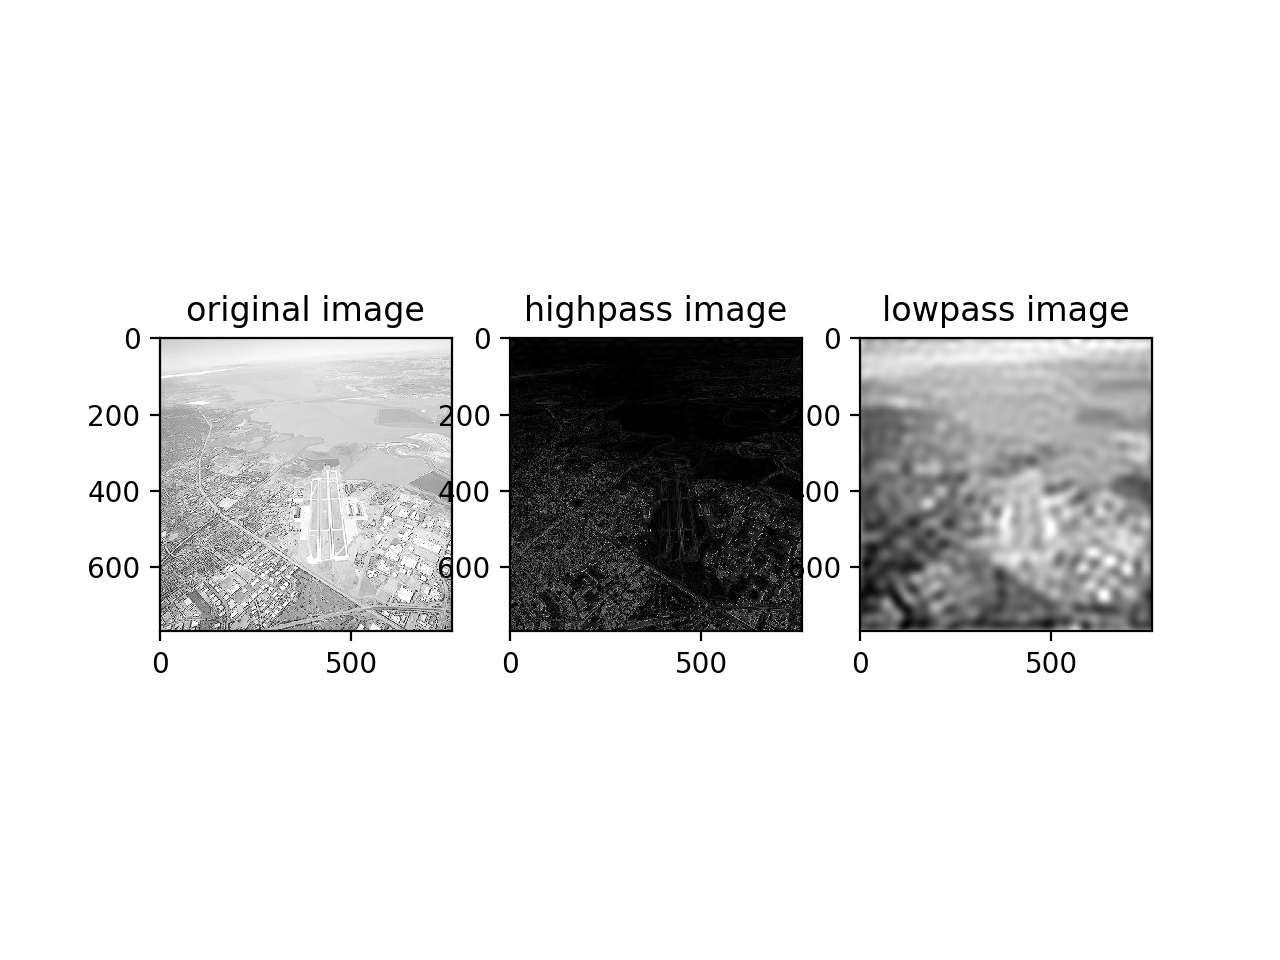

In [10]:
plt.figure('Image')

plt.subplot(1,3,1)
plt.title('original image')
plt.imshow(image, cmap='gray')

plt.subplot(1,3,2)
plt.title('highpass image')
plt.imshow(image_highpass, cmap='gray')

plt.subplot(1,3,3)
plt.title('lowpass image')
plt.imshow(image_lowpass, cmap='gray')
plt.show()